#### Decision Tree:Iris DataSet

#### Creating a decision tree classifier model to classify flowers inot one of the three given possible classes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
!pip install graphviz


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Understanding and cleaning the data

In [4]:
##ensuring that python imports modules from the python system package site using sys.path

In [5]:
import sys
sys.path.insert(0, '/usr/local/lib/python3.9/site-packages')
sys.path

['/usr/local/lib/python3.9/site-packages',
 'C:\\Users\\LENOVO\\Desktop\\desktop docs',
 'C:\\Users\\LENOVO\\Documents\\anaconda\\python312.zip',
 'C:\\Users\\LENOVO\\Documents\\anaconda\\DLLs',
 'C:\\Users\\LENOVO\\Documents\\anaconda\\Lib',
 'C:\\Users\\LENOVO\\Documents\\anaconda',
 '',
 'C:\\Users\\LENOVO\\Documents\\anaconda\\Lib\\site-packages',
 'C:\\Users\\LENOVO\\Documents\\anaconda\\Lib\\site-packages\\win32',
 'C:\\Users\\LENOVO\\Documents\\anaconda\\Lib\\site-packages\\win32\\lib',
 'C:\\Users\\LENOVO\\Documents\\anaconda\\Lib\\site-packages\\Pythonwin']

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

### Importing the IRIS Dataset

In [7]:
iris = load_iris()

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [9]:
df['classes'] = [iris.target_names[i] for i in iris.target]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   classes            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.groupby(['classes']).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
classes,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [13]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classes
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
X = df.drop('classes', axis=1)
y = df['classes']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [16]:
y_train

10         setosa
25         setosa
13         setosa
131     virginica
65     versicolor
          ...    
148     virginica
149     virginica
68     versicolor
35         setosa
129     virginica
Name: classes, Length: 105, dtype: object

In [17]:
##model training 
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

### Making predictions on the train data

In [18]:
x_train_pred = model.predict(X_train)

In [19]:
print(classification_report(y_train, x_train_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        38
  versicolor       1.00      1.00      1.00        32
   virginica       1.00      1.00      1.00        35

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [20]:
##observe an accuracy score of 100% as well precision and recall for all the classes
##this is usually due to overfitting as it has not been constrained as it tries to reach the granularest labels where it 
##finds the gini index of 0.0 for purest classes.

#### printing confusioin matrix and accuracy


In [21]:
print(confusion_matrix(y_train, x_train_pred))

[[38  0  0]
 [ 0 32  0]
 [ 0  0 35]]


### making predicions on the test data

In [22]:
y_pred_default = model.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      0.94      0.94        18
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [24]:
print(confusion_matrix(y_test, y_pred_default))

[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]


In [25]:
##accuracy score is seen as 0.96

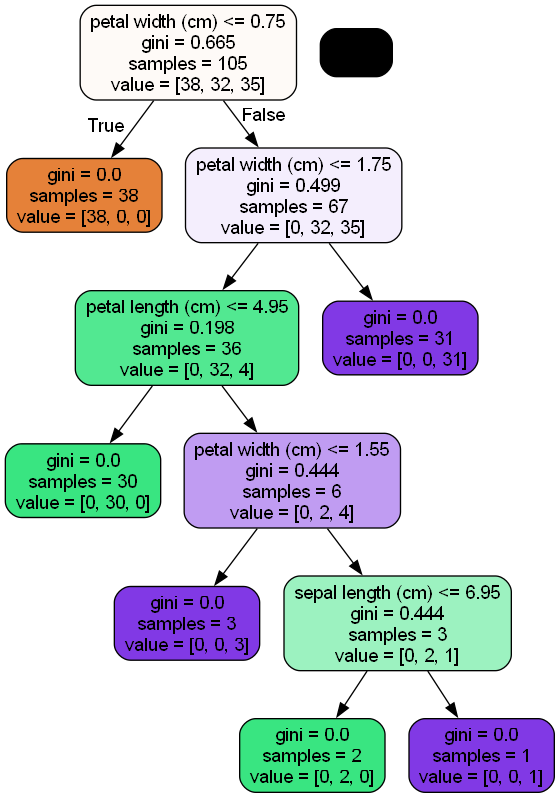

In [26]:
### visualizing the decision tree
features = list(X_train.columns)
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                feature_names=features, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Optimise Hyperparameters using Grid GridSearchCV and K-Fold Cross validation

#### Finding optimum hyperparameters:

#### Finding optimum max_depth

In [27]:
##Gridsearchcv to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [29]:
##specify number of folds for k-fold cv
n_folds = 5

##defining the paramter we want to tune on
parameters = {'max_depth':range(1,10)}

###declaring the decisiontree classifier as our ml model
dtree = DecisionTreeClassifier(criterion='gini', random_state=99)

##invoking the GridSearch Cross Validation
tree = GridSearchCV(dtree, parameters, scoring='accuracy', return_train_score=True, cv=n_folds)

tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=99),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [30]:
##scores of GridSearchCV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012429,0.004153,0.008560,0.003315,1,{'max_depth': 1},0.714286,0.714286,0.714286,0.666667,...,0.695238,0.023328,9,0.690476,0.690476,0.690476,0.702381,0.702381,0.695238,0.005832
1,0.004001,0.000632,0.002702,0.000602,2,{'max_depth': 2},0.952381,1.000000,0.857143,0.952381,...,0.942857,0.046657,7,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
2,0.004189,0.000738,0.003075,0.000660,3,{'max_depth': 3},0.952381,1.000000,0.809524,0.952381,...,0.942857,0.069985,7,0.964286,0.976190,0.988095,0.988095,0.976190,0.978571,0.008909
3,0.005004,0.000634,0.003420,0.000507,4,{'max_depth': 4},1.000000,1.000000,0.857143,0.952381,...,0.952381,0.052164,6,0.976190,0.988095,1.000000,0.988095,1.000000,0.990476,0.008909
4,0.004802,0.000401,0.003401,0.000490,5,{'max_depth': 5},1.000000,1.000000,0.857143,1.000000,...,0.961905,0.055533,1,0.988095,1.000000,1.000000,1.000000,1.000000,0.997619,0.004762


#### visualizing how train and test score chnages with max_depth
##### in this plot we will see how the changes in the value of 'max_depth' parameter values affects the training and testing accuracy

In [32]:
scores.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [40]:
pd.DataFrame(list(zip(scores['param_max_depth'],scores['rank_test_score'])), columns=['max_depth_values','Rankings']).sort_values(by='Rankings', ascending=True)

,max_depth_values,Rankings
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
3,4,6
1,2,7
2,3,7
0,1,9


In [41]:
##the above shows the rank test score with the max_depth value. this can be interpreted as having 5-9 as max_depth
##value increases accruracy. a graphical illustration is shown below.

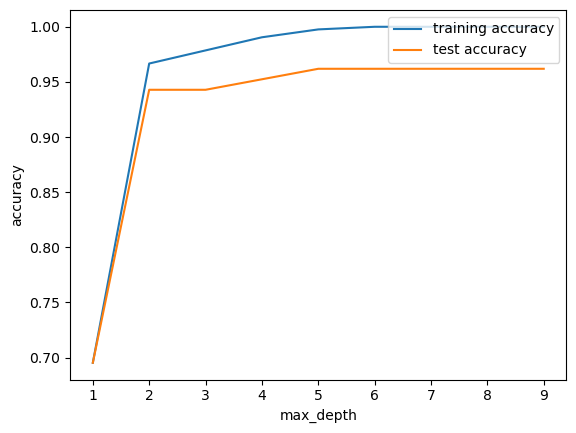

In [33]:
##plotting accuracies with max_depth
plt.figure()
plt.plot(scores['param_max_depth'], scores['mean_train_score'], label='training accuracy')
plt.plot(scores['param_max_depth'], scores['mean_test_score'], label='test accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(loc='upper right')
plt.show()

In [ ]:
### at max_depth value of 5-9 the accuracy stabilizes hence we can pick an optimum value of 5 for max_depth

### Tuning min_samples_leaf

In [42]:
##GridSearchCv to find optimal min_samples_leaf
from sklearn.model_selection import KFold, GridSearchCV

In [44]:
##specify the k  value for number of folds
n_folds = 5

##defining the parameter to tune
parameters = {'min_samples_leaf':range(1,40,3)}

#declaring the ml model as DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini', random_state=99)

##invoking the GridSearchCv
tree = GridSearchCV(dtree, parameters, cv=n_folds, return_train_score=True, scoring='accuracy')

#fitting the model to the data (train)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=99),
             param_grid={'min_samples_leaf': range(1, 40, 3)},
             return_train_score=True, scoring='accuracy')

In [47]:
##invstigating the scores
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002999,0.002002,0.002211,0.000394,1,{'min_samples_leaf': 1},1.000000,1.0,0.857143,1.000000,...,0.961905,0.055533,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001816,0.000406,0.001776,0.000671,4,{'min_samples_leaf': 4},0.952381,1.0,0.857143,1.000000,...,0.961905,0.055533,1,0.964286,0.976190,0.988095,0.976190,0.976190,0.976190,0.007529
2,0.001803,0.000402,0.001409,0.000503,7,{'min_samples_leaf': 7},0.952381,1.0,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.964286,0.988095,0.964286,0.964286,0.969048,0.009524
3,0.002192,0.000404,0.002103,0.000204,10,{'min_samples_leaf': 10},0.952381,1.0,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
4,0.002403,0.000488,0.001663,0.000549,13,{'min_samples_leaf': 13},0.952381,1.0,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664


In [48]:
##viewing the ranks of the min_samples_leaf parameter
pd.DataFrame(list(zip(scores['param_min_samples_leaf'],scores['rank_test_score'])), columns=['param_min_samples_leaf_values','Rankings']).sort_values(by='Rankings', ascending=True)

,param_min_samples_leaf_values,Rankings
0,1,1
1,4,1
2,7,3
3,10,3
4,13,3
5,16,3
6,19,3
7,22,3
8,25,3
9,28,10


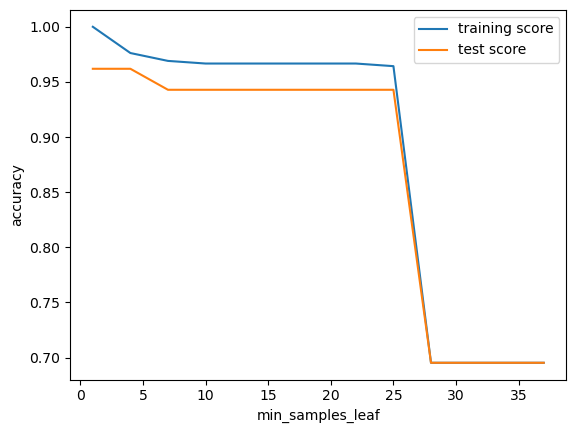

In [49]:
###visualizing the parameter vs accuracy
plt.figure()
plt.plot(scores['param_min_samples_leaf'], scores['mean_train_score'], label='training score')
plt.plot(scores['param_min_samples_leaf'], scores['mean_test_score'], label='test score')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.legend(loc='upper right')
plt.show()


In [ ]:
##we can see that the accuracy is higher at values between 1 and 4.

In [55]:
## repeating the same process for all the hyperparameters

##specify the k  value for number of folds
n_folds = 5

##defining the parameter to tune
parameters = {'max_features':range(1,10)}

#declaring the ml model as DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini', random_state=99)

##invoking the GridSearchCv
tree = GridSearchCV(dtree, parameters, cv=n_folds, return_train_score=True, scoring='accuracy')

#fitting the model to the data (train)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=99),
             param_grid={'max_features': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [56]:
##invstigating the scores
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003358,0.000376,0.001998,0.001095,1,{'max_features': 1},0.952381,0.952381,0.761905,0.809524,...,0.876190,0.077372,9,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.002735,0.000467,0.001627,0.000783,2,{'max_features': 2},1.000000,1.000000,0.857143,0.809524,...,0.923810,0.077372,8,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.002063,0.000126,0.001824,0.000412,3,{'max_features': 3},1.000000,1.000000,0.857143,0.952381,...,0.952381,0.052164,7,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.002092,0.000589,0.001844,0.000702,4,{'max_features': 4},1.000000,1.000000,0.857143,1.000000,...,0.961905,0.055533,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.002410,0.000502,0.001816,0.000411,5,{'max_features': 5},1.000000,1.000000,0.857143,1.000000,...,0.961905,0.055533,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [57]:
##viewing the ranks of the min_samples_leaf parameter
pd.DataFrame(list(zip(scores['param_max_features'],scores['rank_test_score'])), columns=['param_max_features_values','Rankings']).sort_values(by='Rankings', ascending=True)

,param_max_features_values,Rankings
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
2,3,7
1,2,8
0,1,9


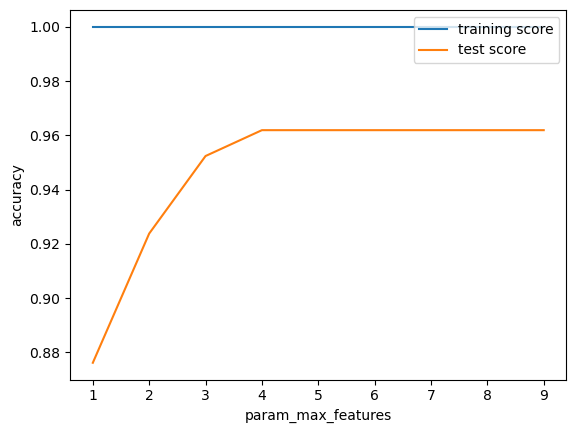

In [58]:
###visualizing the parameter vs accuracy
plt.figure()
plt.plot(scores['param_max_features'], scores['mean_train_score'], label='training score')
plt.plot(scores['param_max_features'], scores['mean_test_score'], label='test score')
plt.xlabel('param_max_features')
plt.ylabel('accuracy')
plt.legend(loc='upper right')
plt.show()

#### we can now use GridSearchCv to find multiple Optimal hyparameters together. In this case we will specify the criterion (gini/entropy) 

In [59]:
##create the parameter grid
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [ ]:
##DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
##min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
##max_features=None, random_state=None, max_leaf_nodes=None, 
##min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

In [60]:
param_grid = {
    'max_depth':range(1,10,1),
    'min_samples_leaf':range(1,40,2),
    'min_samples_split':range(2,30,2),
    'criterion':['entropy','gini']
}

n_folds =5

##instatiate the grid search model
iristree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=iristree, param_grid = param_grid, 
                           cv = n_folds, verbose=1)

#fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5040 candidates, totalling 25200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 40, 2),
                         'min_samples_split': range(2, 30, 2)},
             verbose=1)

In [62]:
##cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003144,0.001577,0.001400,4.899211e-04,entropy,1,1,2,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
1,0.001404,0.000494,0.000999,8.064048e-07,entropy,1,1,4,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
2,0.001804,0.000403,0.001046,1.021947e-04,entropy,1,1,6,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
3,0.001807,0.000404,0.001198,4.003333e-04,entropy,1,1,8,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
4,0.001912,0.000503,0.002110,2.074034e-04,entropy,1,1,10,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,0.001800,0.000400,0.001200,3.998999e-04,gini,9,39,20,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
5036,0.001600,0.000490,0.001400,4.899017e-04,gini,9,39,22,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
5037,0.001600,0.000490,0.001400,4.897262e-04,gini,9,39,24,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
5038,0.001600,0.000490,0.001402,4.878186e-04,gini,9,39,26,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137


In [64]:
cv_results.keys()

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [65]:
##the gridsearchcv will create a parameter called ''best_score_''.
##printing the optimal accuracy score and hyperparameters
print('best accuracy: ', grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy:  0.9714285714285715
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3)


### Running the model with the best parameters obtained from grid search

In [66]:
iristree1 = DecisionTreeClassifier(criterion='entropy',
                                   random_state=100,
                                   max_depth=4,
                                   min_samples_leaf=3,
                                   min_samples_split=2)
iristree1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=100)

In [69]:
###accuracy score
y_pred = iristree1.predict(X_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred))

0.9904761904761905


In [70]:
##testing on the test data
y_test_pred = iristree1.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.9555555555555556


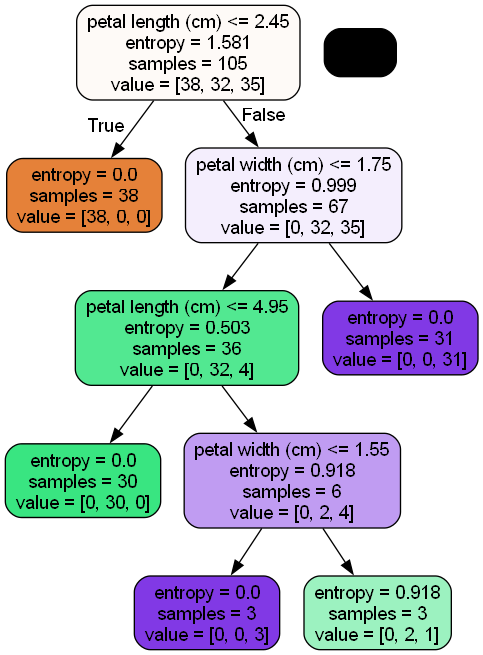

In [72]:
###plotting the tree
features = X_test.columns
dot_data = StringIO()
export_graphviz(iristree1, feature_names = features, filled=True, rounded=True, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### we see that the tree is too complex to understand. let's try reducing the max_depth and see how the tree looks.

In [73]:
##tree with with max_depth = 3
iristree2 = DecisionTreeClassifier(criterion='entropy',
                                   random_state=100,
                                   max_depth=3,
                                   min_samples_leaf=3,
                                   min_samples_split=2)
iristree2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       random_state=100)

In [75]:
y_pred = iristree2.predict(X_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred))

0.9809523809523809


In [76]:
##testing on the test data
y_test_pred = iristree2.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.9555555555555556


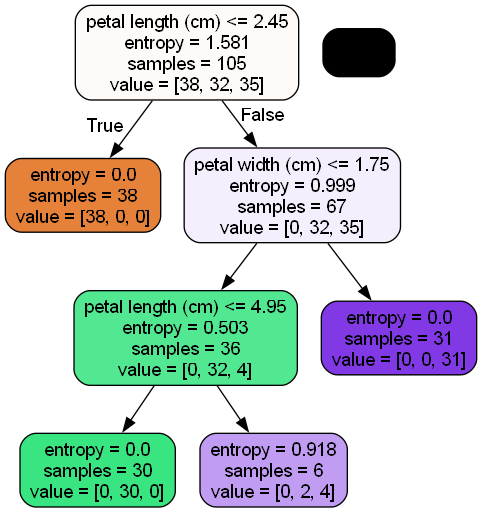

In [77]:
###plotting the tree
features = X_test.columns
dot_data = StringIO()
export_graphviz(iristree2, feature_names = features, filled=True, rounded=True, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [78]:
##classification matrix
y_pred = iristree1.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9555555555555556


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      0.94      0.94        18
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [80]:
##printing the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]
